# Preprocessing

In [ ]:
import deepchem as dc
import numpy as np
import tensorflow as tf
import keras
from keras import layers

from deepchem.models.optimizers import ExponentialDecay
from deepchem.models.seqtoseq import AspuruGuzikAutoEncoder

Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


In [ ]:
import deepchem as dc
tasks, datasets, transformers = dc.molnet.load_muv()
train_dataset, valid_dataset, test_dataset = datasets
train_smiles = train_dataset.ids

In [ ]:
train_smiles[0]

'NC(=O)NC(Cc1ccccc1)C(=O)O'

In [ ]:
tokens = set()

for s in train_smiles:
  tokens = tokens.union(set(s))
tokens = sorted(list(tokens))
max_length = max(len(s) for s in train_smiles)

In [ ]:
tokens

['#',
 '(',
 ')',
 '+',
 '-',
 '/',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '=',
 'B',
 'C',
 'F',
 'H',
 'N',
 'O',
 'S',
 '[',
 '\\',
 ']',
 'c',
 'l',
 'n',
 'o',
 'r',
 's']

# Modeling

In [ ]:
# https://pubs.acs.org/doi/full/10.1021/acscentsci.7b00572
# https://github.com/aspuru-guzik-group/chemical_vae/tree/main

batch_size = 100
batches_per_epoch = len(train_smiles)/batch_size
learning_rate = ExponentialDecay(0.001, 0.95, batches_per_epoch)

model = AspuruGuzikAutoEncoder(tokens, max_length, batch_size=batch_size, learning_rate=learning_rate, model_dir='/checkpoints')

In [ ]:
def create_sequences(epochs):
  for i in range(epochs):
    for s in train_smiles:
      yield(s, s)

model.fit_sequences(create_sequences(200))

In [ ]:
molecule_gen_vae = AspuruGuzikAutoEncoder(num_tokens=tokens, max_output_length=max_length, model_dir='/checkpoints')
molecule_gen_vae.restore()

# Generate Chemical Compounds

In [ ]:
import numpy as np
from rdkit import Chem

# generate
predictions = molecule_gen_vae.predict_from_embeddings(np.random.normal(size=(3000,196)))

/usr/local/lib/python3.10/dist-packages/deepchem/models/seqtoseq.py:335: RuntimeWarning: divide by zero encountered in log
  logprobs = np.log(probs)


In [ ]:
predictions[0]

['O',
 '=',
 'C',
 '(',
 'C',
 'C',
 'c',
 '1',
 'c',
 'n',
 'n',
 'n',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 ')',
 'C',
 'O']

In [ ]:
pred_1 = ''.join(predictions[0])
pred_1

'O=C(CCc1cnnn111111111)CO'

In [ ]:
Chem.MolFromSmiles(pred_1)

[02:23:05] SMILES Parse Error: duplicated ring closure 1 bonds atom 8 to itself for input: 'O=C(CCc1cnnn111111111)CO'


In [ ]:
molecules = []

# filter out invalid smiles
for p in predictions:
    smiles = ''.join(p)
    try:
        rdkit_mol_encoding = Chem.MolFromSmiles(smiles)
        molecules.append(rdkit_mol_encoding)
    except:
        rdkit_mol_encoding = None

molecules

[02:23:10] SMILES Parse Error: duplicated ring closure 1 bonds atom 8 to itself for input: 'O=C(CCc1cnnn111111111)CO'
[02:23:10] SMILES Parse Error: syntax error while parsing: CCOC(=O)c1cc2cc2ccccCCCCCCCCCCCCCCCCCCCCC((O))
[02:23:10] SMILES Parse Error: Failed parsing SMILES 'CCOC(=O)c1cc2cc2ccccCCCCCCCCCCCCCCCCCCCCC((O))' for input: 'CCOC(=O)c1cc2cc2ccccCCCCCCCCCCCCCCCCCCCCC((O))'
[02:23:10] SMILES Parse Error: extra open parentheses for input: 'OCCCONccccccccccn(CCCCCCCCCCCCCOC1'
[02:23:10] SMILES Parse Error: syntax error while parsing: OCCCNCC=CCCC=
[02:23:10] SMILES Parse Error: Failed parsing SMILES 'OCCCNCC=CCCC=' for input: 'OCCCNCC=CCCC='
[02:23:10] SMILES Parse Error: syntax error while parsing: CC1==C=C=CCCCCCCCC=
[02:23:10] SMILES Parse Error: Failed parsing SMILES 'CC1==C=C=CCCCCCCCC=' for input: 'CC1==C=C=CCCCCCCCC='
[02:23:10] SMILES Parse Error: syntax error while parsing: COC(=O)c1cc((CCCCccccccC))))cc2cc1C((OO)O
[02:23:10] SMILES Parse Error: Failed parsing SMILES 'C

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [ ]:
valid_molecules = []

for m in molecules:
  if m is not None:
    valid_molecules.append(m)

valid_molecules

# Pharmaceutical Lead Identification With QED Score

In [ ]:
import rdkit

In [ ]:
# Check if QED metric over 0.5
qed_list = [rdkit.Chem.QED.qed(x) for x in valid_molecules]

final_mol_list = [(a,b) for a,b in
         zip(valid_molecules,qed_list) if b > 0.5]

In [ ]:
final_mol_list

[(<rdkit.Chem.rdchem.Mol at 0x7b6d13cf3d80>, 0.7307221989269221),
 (<rdkit.Chem.rdchem.Mol at 0x7b6ce0571af0>, 0.5144170800755709),
 (<rdkit.Chem.rdchem.Mol at 0x7b6ce05718c0>, 0.6504155252565905),
 (<rdkit.Chem.rdchem.Mol at 0x7b6ce0571f50>, 0.5371539706713412),
 (<rdkit.Chem.rdchem.Mol at 0x7b6ce0571fc0>, 0.5132540532879651),
 (<rdkit.Chem.rdchem.Mol at 0x7b6ce0572030>, 0.5947415127968321),
 (<rdkit.Chem.rdchem.Mol at 0x7b6ce05720a0>, 0.5876417486931574),
 (<rdkit.Chem.rdchem.Mol at 0x7b6ce05726c0>, 0.7626583276064363),
 (<rdkit.Chem.rdchem.Mol at 0x7b6ce05728f0>, 0.666043635351602),
 (<rdkit.Chem.rdchem.Mol at 0x7b6ce0572b20>, 0.8178007949950246),
 (<rdkit.Chem.rdchem.Mol at 0x7b6ce0572ea0>, 0.5465315631244019),
 (<rdkit.Chem.rdchem.Mol at 0x7b6ce0572ff0>, 0.5246045676104629),
 (<rdkit.Chem.rdchem.Mol at 0x7b6ce05730d0>, 0.7548400639075729),
 (<rdkit.Chem.rdchem.Mol at 0x7b6ce0573140>, 0.5016509948033951),
 (<rdkit.Chem.rdchem.Mol at 0x7b6ce0573220>, 0.6095274945925275),
 (<rdkit.Ch

In [ ]:
valid_molecules

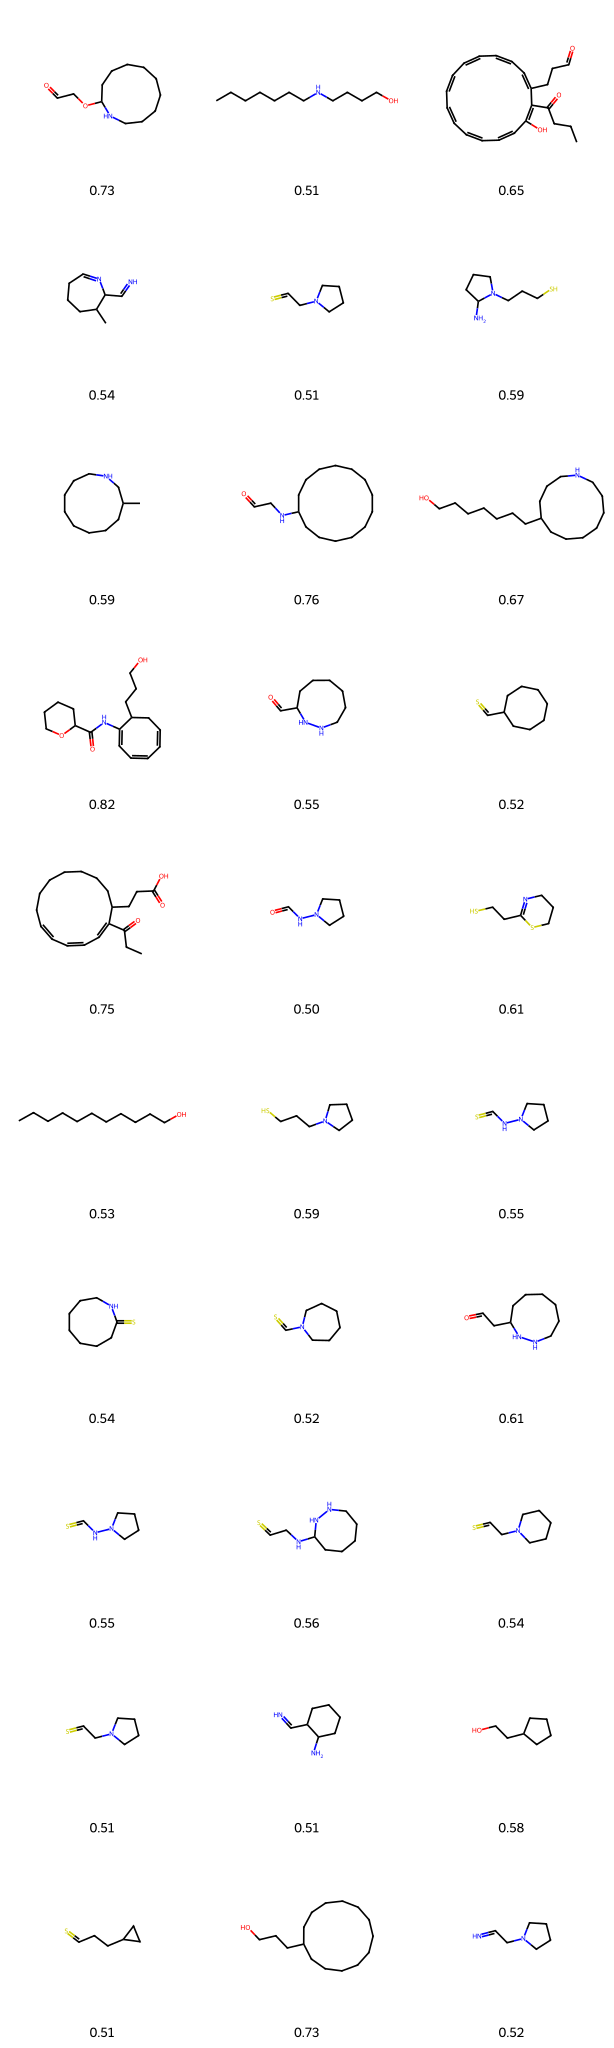

In [ ]:
rdkit.Chem.Draw.MolsToGridImage([x[0] for x in final_mol_list],
molsPerRow=3,useSVG=True,
subImgSize=(250, 250),
legends=[f"{x[1]:.2f}" for x in final_mol_list])